In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import stanfordnlp
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
file = "PFACD\\FLH Reviews(1).xlsx"



res = pd.read_excel(file, 'Reservas')
prop = pd.read_excel(file, 'Propriedades')
guests = pd.read_excel(file, 'Hóspedes')
reviews1 = pd.read_excel(file, 'Reviews - geral')
reviews2 = pd.read_excel(file, 'Reviews - detalhe')

## Base de dados Reservas

In [3]:
res

,ReservationId,PropertyId,Check_in,Check_Out,Ocupantes,Valor_Reserva,Data_reserva
0,43464,542,2017-10-19,2017-10-22,4,241.53,2017-10-19
1,53670,415,2018-03-19,2018-03-22,2,151.32,2018-03-18
2,52032,172,2018-04-08,2018-04-12,4,263.84,2018-03-01
3,53437,472,2018-04-20,2018-04-23,8,1379.34,2018-03-16
4,49332,612,2018-05-01,2018-05-04,2,241.53,2018-01-30
...,...,...,...,...,...,...,...
9160,1879187225,675,2021-12-31,2022-01-03,4,495.00,2021-11-14
9161,1879178958,1800,2021-12-26,2022-01-07,2,1260.00,2021-10-03
9162,1879178889,1075,2021-12-28,2022-01-05,2,1984.00,2021-10-02
9163,1879183798,353,2021-12-28,2022-01-02,1,537.00,2021-10-25


In [4]:
res.dtypes

ReservationId             int64
PropertyId                int64
Check_in         datetime64[ns]
Check_Out        datetime64[ns]
Ocupantes                 int64
Valor_Reserva           float64
Data_reserva     datetime64[ns]
dtype: object

In [5]:
res['ReservationId'].unique()

array([     43464,      53670,      52032, ..., 1879178889, 1879183798,
       1879190591], dtype=int64)

In [6]:
res['ReservationId'].value_counts()

1812017394    3
1879180443    2
1879170618    2
1879181917    2
1879184045    2
             ..
1812024378    1
1812014896    1
77109         1
1812020996    1
1879190591    1
Name: ReservationId, Length: 9066, dtype: int64

In [7]:
duplicated_rows = res[res['ReservationId'].duplicated(keep=False)]
duplicated_rows

,ReservationId,PropertyId,Check_in,Check_Out,Ocupantes,Valor_Reserva,Data_reserva
4557,1812017394,468,2019-10-13,2019-10-18,4,389.69,2019-04-07
4558,1812017394,468,2019-10-13,2019-10-18,4,389.69,2019-04-07
4559,1812017394,468,2019-10-13,2019-10-18,4,389.69,2019-04-07
4567,1812037972,706,2019-10-15,2019-10-18,3,186.00,2019-10-06
4568,1812037972,706,2019-10-15,2019-10-18,3,186.00,2019-10-06
...,...,...,...,...,...,...,...
8947,1879185383,229,2021-11-30,2021-12-02,6,442.00,2021-11-04
8960,1879176775,431,2021-12-03,2021-12-08,4,255.00,2021-09-21
8961,1879176775,431,2021-12-03,2021-12-08,4,255.00,2021-09-21
8987,1879179705,1017,2021-12-06,2021-12-08,2,112.20,2021-10-06


In [8]:
all_columns_duplicated = duplicated_rows[duplicated_rows.duplicated(keep=False)]

In [9]:
duplicated_rows.shape

(197, 7)

In [10]:
all_columns_duplicated.shape

(197, 7)

Acabamos de provar que a linhas com ReservationId repetido são a mesma reserva repetida , por isso podemos apagar as repetidas

In [11]:
res = res.drop_duplicates(subset='ReservationId', keep=False)

In [12]:
res['PropertyId'].unique()

array([ 542,  415,  172,  472,  612,  674,  220,  473,  605,  511,  409,
        632,  232,  618,  209,  654,  316,  263,  615,  650,  338,  659,
        672,  670,  538,  505,  377,  260,  300,  431,  652,  329,  426,
        588,  369,  589,  239,  238,  210,  339,  643,  584,  421,  331,
        598,  641,  668,  622,  446,  575,  467,  251,  526,  164,  381,
        457,  183,  271,  287,  620,  367,  560,    1,  351,  308,  310,
        254,  422,  376,  524,  662,  657,  568,  214,  291,  629,  246,
        299,  617,  566,  311,  352,  384,  604,  613,  414,  258,  474,
        500,  480,  460,  285,  531,  213,  534,  318,  482,  462,  425,
         19,  353,  569,  709,  509,  562,  608,  229,  468,  423,  184,
        161,  470,  691,  522,   79,  548,  335,  182,  448,  510,  349,
        597,  413,   55,  675,  504,  561,  479,  680,  185,  714,  545,
        701,  638,  334,  190,  195,  200,  286,  700,  278,  128,  385,
        189,  332,  708,  497,  159,  490,  587,  4

In [13]:
res['PropertyId'].value_counts()

263     84
511     84
692     83
736     80
229     73
        ..
236      1
870      1
862      1
231      1
1600     1
Name: PropertyId, Length: 646, dtype: int64

In [14]:
res['Check_in'].unique()

array(['2017-10-19T00:00:00.000000000', '2018-03-19T00:00:00.000000000',
       '2018-04-08T00:00:00.000000000', ...,
       '2021-12-29T00:00:00.000000000', '2021-12-30T00:00:00.000000000',
       '2021-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [15]:
res['Check_in'].value_counts()

2019-11-29    33
2021-10-01    31
2019-02-08    29
2020-02-07    28
2019-11-15    28
              ..
2020-10-15     1
2020-10-13     1
2020-10-11     1
2020-10-07     1
2017-10-19     1
Name: Check_in, Length: 1100, dtype: int64

In [16]:
res['Check_Out'].unique()

array(['2017-10-22T00:00:00.000000000', '2018-03-22T00:00:00.000000000',
       '2018-04-12T00:00:00.000000000', ...,
       '2022-01-07T00:00:00.000000000', '2022-01-06T00:00:00.000000000',
       '2022-01-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [17]:
res['Check_Out'].value_counts()

2020-02-24    31
2021-11-14    30
2021-11-21    30
2021-11-28    28
2020-02-16    28
              ..
2020-12-28     1
2020-12-30     1
2020-12-29     1
2020-12-22     1
2022-01-05     1
Name: Check_Out, Length: 1115, dtype: int64

In [18]:
res['Ocupantes'].unique()

array([ 4,  2,  8,  6,  3,  5,  7,  1, 10,  9, 12,  0], dtype=int64)

In [19]:
res['Ocupantes'].value_counts()

2     2566
4     2528
3     1778
5      658
6      652
1      468
7      150
8      113
9       26
10      16
0       10
12       3
Name: Ocupantes, dtype: int64

In [20]:
for index, row in res[res['Ocupantes'] == 0].iterrows():
    reservation_id_count = guests[guests['ReservationId'] == row['ReservationId']].shape[0]
    res.at[index, 'Ocupantes'] = reservation_id_count

In [21]:
res['Ocupantes'].value_counts()

2     2566
4     2528
3     1778
5      658
6      652
1      478
7      150
8      113
9       26
10      16
12       3
Name: Ocupantes, dtype: int64

In [22]:
res['Valor_Reserva'].unique()

array([ 241.53,  151.32,  263.84, ...,  756.  , 1260.  ,  724.  ])

In [23]:
res['Valor_Reserva'].value_counts()

156.00    146
186.00    104
104.00    101
146.00     94
166.00     94
         ... 
513.40      1
894.00      1
459.79      1
719.59      1
724.00      1
Name: Valor_Reserva, Length: 1817, dtype: int64

In [24]:
res['Data_reserva'].unique()

array(['2017-10-19T00:00:00.000000000', '2018-03-18T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', ...,
       '2021-12-27T00:00:00.000000000', '2021-12-29T00:00:00.000000000',
       '2021-12-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [25]:
res['Data_reserva'].value_counts()

2021-08-31    28
2021-09-12    25
2021-09-05    25
2019-06-09    25
2021-10-12    25
              ..
2020-12-01     1
2020-11-26     1
2020-11-16     1
2020-11-07     1
2021-12-28     1
Name: Data_reserva, Length: 1288, dtype: int64

In [26]:
res.isna().sum()

ReservationId    0
PropertyId       0
Check_in         0
Check_Out        0
Ocupantes        0
Valor_Reserva    0
Data_reserva     3
dtype: int64

In [27]:
res.dropna(inplace=True)
#Como são apenas 3 valores omissos vamos apagar

C:\Users\asus\AppData\Local\Temp\ipykernel_23096\2859934351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res.dropna(inplace=True)


## Base de dados Propriedades

In [28]:
prop

,PropertyId,Região,Cidade,Bairro,Inativo,Data_Inicio,Data_Inativo,ArCondicionado,MaqLoica,MaqRoupa,Elevador,Andar,Tipologia
0,1,Lisboa,Lisboa,Santa Catarina,0,2014-08-05 00:00:00.000,NaT,1,1,1,0.0,R/C,T2
1,2,Lisboa,Lisboa,NaN,1,2014-03-18 00:00:00.000,NaT,0,0,0,NaN,NaN,NaN
2,3,Lisboa,Lisboa,NaN,1,2013-10-22 00:00:00.000,NaT,0,0,0,NaN,NaN,NaN
3,4,Lisboa,Lisboa,S. Bento,1,2013-11-28 00:00:00.000,NaT,0,1,1,NaN,3º,T1
4,5,Lisboa,Lisboa,NaN,1,2013-11-12 00:00:00.000,NaT,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,1796,Madeira,Funchal,NaN,0,2021-09-11 10:00:27.669,NaT,1,1,1,1.0,Piso 2,T0
1069,1797,Madeira,Funchal,NaN,0,2021-09-11 10:07:16.867,NaT,1,1,1,1.0,Piso 2,T1
1070,1798,Madeira,Funchal,NaN,0,2021-09-11 10:11:53.426,NaT,1,1,1,1.0,Piso 2,T1
1071,1799,Madeira,Funchal,NaN,0,2021-09-11 10:14:58.206,NaT,1,1,1,1.0,Piso 3,T1


In [29]:
prop.dtypes

PropertyId                 int64
Região                    object
Cidade                    object
Bairro                    object
Inativo                    int64
Data_Inicio       datetime64[ns]
Data_Inativo      datetime64[ns]
ArCondicionado             int64
MaqLoica                   int64
MaqRoupa                   int64
Elevador                 float64
Andar                     object
Tipologia                 object
dtype: object

In [30]:
prop['PropertyId'].unique()

array([   1,    2,    3, ..., 1798, 1799, 1800], dtype=int64)

In [31]:
prop['PropertyId'].value_counts()

1       1
256     1
182     1
183     1
184     1
       ..
500     1
502     1
505     1
507     1
1800    1
Name: PropertyId, Length: 1073, dtype: int64

In [32]:
prop['Região'].unique()

array(['Lisboa', 'Porto', 'Algarve', 'Madeira'], dtype=object)

In [33]:
prop['Região'].value_counts()

Lisboa     703
Algarve    172
Porto      147
Madeira     51
Name: Região, dtype: int64

In [34]:
prop['Cidade'].unique()

array(['Lisboa', nan, 'Torres Vedras', 'Portimão', 'Aroeira', 'Cascais',
       'Arraiolos', 'Ericeira', 'Lourinhã', 'Estoril', 'Azeitão',
       'Zambujeira', 'Palmela', 'Funchal', 'Porto', 'Montemor',
       'Santarém', 'Azeitão 2', 'Lagos', 'Sintra', 'Melides', 'Oeiras',
       'São Pedro da Cadeira', 'Grândola', 'São João das Lampas',
       'Tavira', 'Vila Nova de Gaia', 'Vilamoura', 'Matosinhos',
       'São Martinho de Sardoura', 'São João da Pesqueira',
       'Carrapateira', 'Armação de Pêra', 'Albufeira', 'Vale do Lobo',
       'Monte Gordo', 'Vila Real de Santo António', 'Carvoeiro',
       'Porches', 'Olhão', 'Altura', 'Lagoa', 'Silves', 'Faro',
       'Quarteira', 'Alvor', 'São Brás de Alportel', 'Loulé',
       'Santa Cruz'], dtype=object)

In [35]:
prop['Cidade'].value_counts()

Lisboa                        588
Porto                         128
Funchal                        51
Ericeira                       51
Vilamoura                      30
Portimão                       27
Albufeira                      27
Cascais                        22
Tavira                         16
Monte Gordo                    14
Vila Nova de Gaia              12
Carvoeiro                       8
Lagos                           8
Armação de Pêra                 7
Porches                         7
Estoril                         6
Oeiras                          5
Matosinhos                      5
Lagoa                           5
Altura                          5
Vila Real de Santo António      4
São João das Lampas             4
Olhão                           4
Sintra                          3
Quarteira                       3
Loulé                           3
Vale do Lobo                    3
Torres Vedras                   2
Faro                            2
Zambujeira    

In [36]:
prop['Cidade'] = prop['Cidade'].replace('Azeitão 2', 'Azeitão')

In [37]:
prop['Bairro'].unique()

array(['Santa Catarina', nan, 'S. Bento', 'Marquês de Pombal', 'Estrela',
       'Av. Novas', 'Principe Real', 'Bairro Alto', 'Lapa', 'Restelo',
       'Martim Moniz', 'S. José', 'Campo de Ourique', 'Chiado', 'Graça',
       'Alfama', 'Ajuda', 'Cascais', 'Intendente', 'Ericeira', 'Lourinhã',
       'Caxias', 'Estoril', 'Azeitão', 'Santos-o-Velho', 'Zambujeira',
       'Funchal', 'Expo', 'Baixa', 'Beato', 'Almirante Reis', 'Belém',
       'Laranjeiras', 'Castelo', 'Sé', 'Mercês', 'Madragoa', 'Acântara',
       'Saldanha', 'Campolide', 'Av. da Liberdade', 'Cais do Sodré',
       'Estefânia', 'Oeiras', 'Olivais', 'Mouraria', 'Areeiro', 'Bica',
       'Av Liberdade', 'Restauradores', 'Santa Marta', 'Rato',
       'Alcântara', 'Benfica', 'Ribeira', 'Cedofeita', 'Boavista', 'Foz',
       'Trindade', 'Porto', 'Vila Nova de Gaia', 'Carrapateira'],
      dtype=object)

In [38]:
prop['Bairro'].value_counts()

Baixa             94
Principe Real     38
Bairro Alto       32
Alfama            29
Santa Catarina    28
                  ..
Azeitão            1
Areeiro            1
Zambujeira         1
Acântara           1
Carrapateira       1
Name: Bairro, Length: 61, dtype: int64

In [39]:
prop['Bairro'] = prop['Bairro'].replace('Acântara', 'Alcântara')
prop['Bairro'] = prop['Bairro'].replace('Av Liberdade', 'Av. da Liberdade')

In [40]:
prop['Inativo'].unique()

array([0, 1], dtype=int64)

In [41]:
prop['Inativo'].value_counts()

0    544
1    529
Name: Inativo, dtype: int64

In [42]:
prop['Data_Inicio'].unique()

array(['2014-08-05T00:00:00.000000000', '2014-03-18T00:00:00.000000000',
       '2013-10-22T00:00:00.000000000', ...,
       '2021-09-11T10:11:53.426000000', '2021-09-11T10:14:58.206000000',
       '2021-09-11T10:18:12.468000000'], dtype='datetime64[ns]')

In [43]:
prop['Data_Inativo'].unique()

array([                          'NaT', '2021-01-15T12:07:50.601000000',
       '2021-12-16T11:55:36.226000000', '2021-12-16T11:55:32.706000000',
       '2021-01-14T16:25:01.604000000', '2021-01-14T15:15:54.897000000',
       '2020-08-17T11:09:16.978000000', '2021-01-15T12:18:12.320000000',
       '2021-01-14T16:51:28.129000000', '2021-01-14T16:10:57.695000000',
       '2021-01-15T12:24:51.984000000', '2021-01-15T12:27:14.307000000',
       '2021-01-15T12:31:10.646000000', '2021-01-14T15:30:52.124000000',
       '2021-01-14T14:32:12.361000000', '2021-12-16T11:55:00.453000000',
       '2021-01-14T17:13:24.589000000', '2021-01-15T12:33:32.798000000',
       '2021-01-14T17:18:49.469000000', '2021-01-14T17:18:53.841000000',
       '2021-01-14T14:33:16.009000000', '2021-12-16T11:55:07.712000000',
       '2021-01-14T16:39:58.227000000', '2021-01-15T12:39:01.654000000',
       '2021-12-16T11:55:11.512000000', '2021-01-14T17:19:41.408000000',
       '2020-12-06T15:57:05.869000000', '2020-12-06

In [44]:
prop['ArCondicionado'].unique()

array([1, 0], dtype=int64)

In [45]:
prop['ArCondicionado'].value_counts()

0    683
1    390
Name: ArCondicionado, dtype: int64

In [46]:
prop['MaqLoica'].unique()

array([1, 0], dtype=int64)

In [47]:
prop['MaqLoica'].value_counts()

1    957
0    116
Name: MaqLoica, dtype: int64

In [48]:
prop['Elevador'] = pd.to_numeric(prop['Elevador'], errors='coerce').astype('Int64')


In [49]:
prop['Elevador'].unique()

<IntegerArray>
[0, <NA>, 1]
Length: 3, dtype: Int64

In [50]:
prop['Elevador'].value_counts()

1    312
0    115
Name: Elevador, dtype: Int64

In [51]:
prop['Andar'].unique()

array(['R/C', nan, '3º', '1º', '2º', '5º', 'R/c', '6º', '4º', 'Moradia',
       'R/C A', 'Cave', '8º', -1, '7º', 5, '9º', '13º', 'r/c', '12º',
       'Cave Dta', '2A', 'R/C C', 'piso 2 – 2C', '3A', '2E', '3E', 2.2,
       'Loja', 3, 4, '4B', 'B3-E', 'B1-D', '1E', '5A', '5B', '4E',
       'R/C Frente 2A', 'Outeirinho', 'Sobre Loja Esq.', 'B1 (-1C)', '5C',
       'r/c esq', '2C', '3C', '2.4P', '2.3Q', 1, '3B', 2, 6,
       '1ºD (real 1º Frente)', 2.4, 'Cave Trás', '2 º', 'B0.2', '11º',
       'Piso -1', 'Piso 0', '1F', '1T', '2F', '2T', '3T', '4ºH', 'cave',
       13, '3a', 'RC', 'fração AR', 'fração AT', '5G', '5H', '4A',
       'fração S', 'Quinta do Lago', 'RC-D', 'Branqueira', '4H',
       'letra C', '4 B', '15º', 'R/C Inferior', '2º Esq Sul', 8, 'Piso 1',
       'Piso 2', 'Piso 3'], dtype=object)

In [52]:
prop['Andar'].value_counts()

1º         167
2º         162
R/C        120
3º         115
Moradia     70
          ... 
2 º          1
B0.2         1
12º          1
Piso -1      1
3C           1
Name: Andar, Length: 88, dtype: int64

In [53]:
values_to_replace =['R/c','r/c','RC-D','R/C Inferior','R/C Frente 2A','R/C A','R/C C','r/c esq','Piso 0','B0.2','RC']
replacement_value = 'R/C'
prop['Andar'] = prop['Andar'].replace(values_to_replace, replacement_value)

In [54]:
values_to_replace =[1,'1ºD (real 1º Frente)','1F', '1T','Piso 1','1E']
replacement_value = '1º'
prop['Andar'] = prop['Andar'].replace(values_to_replace, replacement_value)

In [55]:
values_to_replace =['2A','piso 2 – 2C','2E',2.2,'2C','2.4P','2.3Q',2,2.4,'2 º','2F','2T','2º Esq Sul','Piso 2']
replacement_value = '2º'
prop['Andar'] = prop['Andar'].replace(values_to_replace, replacement_value)

In [56]:
values_to_replace =['3A','3E',3,'3C','3B','3T','3a','Piso 3']
replacement_value = '3º'
prop['Andar'] = prop['Andar'].replace(values_to_replace, replacement_value)

In [57]:
values_to_replace =[4,'4E','4ºH','4A','4H','4 B','4B']
replacement_value = '4º'
prop['Andar'] = prop['Andar'].replace(values_to_replace, replacement_value)

In [58]:
values_to_replace =[5,'5A','5H','5G','5C','5B',]
replacement_value = '5º'
prop['Andar'] = prop['Andar'].replace(values_to_replace, replacement_value)

In [59]:
values_to_replace =['Piso -1','B1 (-1C)','B1-D']
replacement_value = -1
prop['Andar'] = prop['Andar'].replace(values_to_replace, replacement_value)

In [60]:
values_to_replace =[6]
replacement_value =  '6º'
prop['Andar'] = prop['Andar'].replace(values_to_replace, replacement_value)

In [61]:
values_to_replace =[8]
replacement_value =  '8º'
prop['Andar'] = prop['Andar'].replace(values_to_replace, replacement_value)

In [62]:
values_to_replace =[13]
replacement_value =  '13º'
prop['Andar'] = prop['Andar'].replace(values_to_replace, replacement_value)

In [63]:
values_to_replace =['cave','Cave Dta','Cave Trás']
replacement_value =  'Cave'
prop['Andar'] = prop['Andar'].replace(values_to_replace, replacement_value)

In [64]:
values_to_replace =['Loja', 'B3-E', 'Outeirinho','Sobre Loja Esq.','fração AR', 'fração AT', 'fração S','Quinta do Lago', 'Branqueira', 'letra C']
replacement_value =  'Outros'
prop['Andar'] = prop['Andar'].replace(values_to_replace, replacement_value)

In [65]:
prop['Andar'].value_counts()

1º         190
2º         186
R/C        155
3º         131
4º          74
Moradia     70
5º          43
6º          16
7º          11
Outros      10
Cave         9
8º           5
13º          4
-1           4
11º          3
9º           2
12º          1
15º          1
Name: Andar, dtype: int64

In [66]:
prop['Tipologia'].unique()

array(['T2', nan, 'T1', 'T3', 'T0', 'T2 Duplex', 'T3 Duplex', 'T6', 'T4',
       ' T2', 'T5', 'T1 Duplex', 'Studio', 'Moradia'], dtype=object)

In [67]:
prop['Tipologia'].value_counts()

T1           333
T2           329
T3           124
T0            79
T4            35
T5            16
Studio         9
T2 Duplex      8
T1 Duplex      7
T3 Duplex      4
T6             4
 T2            1
Moradia        1
Name: Tipologia, dtype: int64

In [68]:
#Isto não é op tratamento final dos valores omissos , é apenas para poder fazer o passo seguinte
prop['Tipologia'] = prop['Tipologia'].fillna('0')

In [69]:
prop['Duplex'] = prop['Tipologia'].str.contains('Duplex').astype(int)

In [70]:
prop['Duplex'].value_counts()

0    1054
1      19
Name: Duplex, dtype: int64

In [71]:
values_to_replace =['T2 Duplex',' T2']
replacement_value =  'T2'
prop['Tipologia'] = prop['Tipologia'].replace(values_to_replace, replacement_value)

In [72]:
values_to_replace =['T1 Duplex']
replacement_value =  'T1'
prop['Tipologia'] = prop['Tipologia'].replace(values_to_replace, replacement_value)

In [73]:
values_to_replace =['T3 Duplex']
replacement_value =  'T3'
prop['Tipologia'] = prop['Tipologia'].replace(values_to_replace, replacement_value)

In [74]:
values_to_replace =['Moradia']
replacement_value =  '0'
prop['Tipologia'] = prop['Tipologia'].replace(values_to_replace, replacement_value)

In [75]:
prop.isna().sum()

PropertyId          0
Região              0
Cidade              1
Bairro            430
Inativo             0
Data_Inicio         0
Data_Inativo      836
ArCondicionado      0
MaqLoica            0
MaqRoupa            0
Elevador          646
Andar             158
Tipologia           0
Duplex              0
dtype: int64

In [76]:
prop.shape

(1073, 14)

##### Valores omissos

In [77]:
###Bairro
prop['Bairro'].fillna('Desconhecido', inplace=True)

In [78]:
###Data Inativo
prop.drop(columns=['Data_Inativo'], inplace=True)

In [79]:
###Elevador
elevador_proportions = prop['Elevador'].value_counts(normalize=True)

# Function to fill missing values based on proportions
def fill_elevador_na(row):
    if pd.isna(row['Elevador']):
        return elevador_proportions.sample(1, weights=elevador_proportions).index[0]
    else:
        return row['Elevador']

# Apply the function to fill missing values in 'Elevador'
prop['Elevador'] = prop.apply(fill_elevador_na, axis=1)

In [80]:
###Andar

andar_proportions = prop['Andar'].value_counts(normalize=True)


def fill_andar_na(row):
    if pd.isna(row['Andar']):
        return andar_proportions.sample(1, weights=andar_proportions).index[0]
    else:
        return row['Andar']

prop['Andar'] = prop.apply(fill_andar_na, axis=1)

In [81]:
###Cidade-1 valor
prop.dropna(inplace=True)

In [82]:
prop.isna().sum()

PropertyId        0
Região            0
Cidade            0
Bairro            0
Inativo           0
Data_Inicio       0
ArCondicionado    0
MaqLoica          0
MaqRoupa          0
Elevador          0
Andar             0
Tipologia         0
Duplex            0
dtype: int64

In [83]:
def categorize_floor(floor):
    ground_floor_and_basement = ['R/C', 'Cave', '-1']
    lower_floors = ['1º', '2º', '3º']
    middle_floors = ['4º', '5º', '6º', '7º']
    higher_floors = ['8º', '9º', '11º', '12º', '13º', '15º']
    special_cases = ['Moradia', 'Outros']

    if floor in ground_floor_and_basement:
        return 'Ground Floor and Basement'
    elif floor in lower_floors:
        return 'Lower Floors (1st to 3rd)'
    elif floor in middle_floors:
        return 'Middle Floors (4th to 7th)'
    elif floor in higher_floors:
        return 'Higher Floors (8th and above)'
    elif floor in special_cases:
        return 'Special Cases'
    else:
        return 'Uncategorized'

# Apply the function to create a new column 'Floor_Category'
prop['Floor_Category'] = prop['Andar'].apply(categorize_floor)

In [84]:
def categorize_tipologia(tipologia):
    studio_types = ['Studio', 'T0']
    small_apartments = ['T1', 'T2']
    medium_apartments = ['T3', 'T4']
    large_apartments = ['T5', 'T6']
    unknown = ['0']

    if tipologia in studio_types:
        return 'Studio/0-Bedroom'
    elif tipologia in small_apartments:
        return 'Small Apartments (T1-T2)'
    elif tipologia in medium_apartments:
        return 'Medium Apartments (T3-T4)'
    elif tipologia in large_apartments:
        return 'Large Apartments (T5-T6)'
    elif tipologia in unknown:
        return 'Unknown'
    else:
        return 'Uncategorized'

# Apply the function to create a new column 'Tipologia_Category'
prop['Tipologia_Category'] = prop['Tipologia'].apply(categorize_tipologia)

C:\Users\asus\AppData\Local\Temp\ipykernel_23096\1171523074.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_clustering[column] = label_encoder.fit_transform(prop_clustering[column])
C:\Users\asus\AppData\Local\Temp\ipykernel_23096\1171523074.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_clustering[column] = label_encoder.fit_transform(prop_clustering[column])
C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

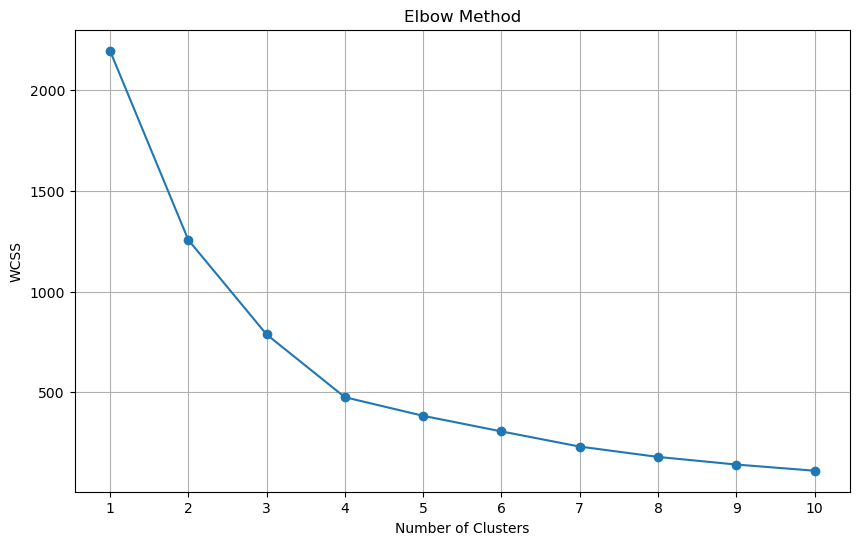

In [87]:
prop_clustering = prop[['Floor_Category', 'Tipologia_Category']]  # Subset of columns for clustering

# Encoding categorical variables if needed
label_encoder = LabelEncoder()
for column in prop_clustering.columns:
    if prop_clustering[column].dtype == 'object':
        prop_clustering[column] = label_encoder.fit_transform(prop_clustering[column])

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(prop_clustering)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [88]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(prop_clustering)

prop_clustering['Cluster'] = cluster_labels
prop['Cluster'] = cluster_labels

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\asus\AppData\Local\Temp\ipykernel_23096\3850321513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_clustering['Cluster'] = cluster_labels


In [89]:
prop.head(1)

,PropertyId,Região,Cidade,Bairro,Inativo,Data_Inicio,ArCondicionado,MaqLoica,MaqRoupa,Elevador,Andar,Tipologia,Duplex,Floor_Category,Tipologia_Category,Cluster
0,1,Lisboa,Lisboa,Santa Catarina,0,2014-08-05,1,1,1,0,R/C,T2,0,Ground Floor and Basement,Small Apartments (T1-T2),0


In [90]:
cluster_info = prop_clustering.groupby('Cluster').mean()
cluster_info

,Floor_Category,Tipologia_Category
Cluster,,
0,0.010152,2.208122
1,2.309091,3.618182
2,1.967010,1.820619
3,3.413333,1.600000


In [91]:
cluster_labels = {
    0: 'Ground-Level Medium Apartments',
    1: 'Higher-Floor Large Apartments',
    2: 'Middle-Floor Medium Apartments',
    3: 'Higher-Floor Medium Apartments'
}

# Assign cluster labels based on cluster numbers
prop['Cluster'] = prop['Cluster'].map(cluster_labels)

### Base de dados Hóspedes

In [92]:
guests

,ReservationId,Age,GuestCountry
0,43464,59.0,DE
1,53670,34.0,PT
2,52032,55.0,FR
3,53437,58.0,EC
4,49332,68.0,AU
...,...,...,...
9160,1879187225,44.0,ITA
9161,1879178958,39.0,DEU
9162,1879178889,40.0,GBR
9163,1879183798,23.0,PRT


In [93]:
guests['Age'].unique()

array([  59.,   34.,   55.,   58.,   68.,   39.,   30.,   62.,   40.,
         38.,   25.,   45.,   69.,   61.,   31.,   51.,   57.,   43.,
         47.,   48.,   37.,   46.,   26.,   77.,   50.,   71.,   33.,
         49.,   32.,   52.,   36.,   64.,   27.,   41.,   29.,   42.,
         35.,   28.,   44.,   56.,   63.,   24.,   66.,   76.,   54.,
         70.,   65.,   67.,   72.,   53.,   23.,   22.,   60.,    5.,
         74.,   75.,   21.,    4.,   nan,   17.,   73.,   78.,  155.,
         79.,  944.,   89.,   81.,   11.,    6.,   20.,    3.,    9.,
       -961.,   83.,    7.,   19., -951.,   80.,    2.,    1.,   10.,
         15.,   18.,   -2.,   -6.,   16.,    0.])

In [94]:
guests[guests['Age']==-961].value_counts()

ReservationId  Age     GuestCountry
1812030014     -961.0  ES              1
dtype: int64

In [95]:
guests[guests['Age']==-951].value_counts()

ReservationId  Age     GuestCountry
1879083437     -951.0  PT              1
dtype: int64

In [96]:
guests[guests['Age']==0].value_counts()

ReservationId  Age  GuestCountry
1879181329     0.0  GBR             1
dtype: int64

In [97]:
guests[guests['Age']==155].value_counts()

ReservationId  Age    GuestCountry
74037          155.0  FI              1
dtype: int64

In [98]:
guests[guests['Age']==944].value_counts()

ReservationId  Age    GuestCountry
1812018409     944.0  ES              1
dtype: int64

In [99]:
guests['GuestCountry'].unique()

array(['DE', 'PT', 'FR', 'EC', 'AU', 'SI', 'GB', 'US', 'CL', 'CA', 'BE',
       'BR', 'PL', 'CH', 'ES', 'Netherlands', 'ZA', 'IT', 'AR', 'PK',
       'NL', 'LV', 'CN', 'CO', 'SG', 'HU', 'DK', 'IE', 'EE', 'HR', 'LB',
       'RU', 'IN', 'IL', 'NZ', 'UA', 'TR', 'NO', 'SE', 'MX', 'USA', 'LT',
       'RO', 'GR', 'AT', 'FI', 'SK', 'TW', 'AL', 'MY', 'CZ', 'frança',
       'canada', 'KR', 'Noruega', 'VN', 'JP', 'Alemanha', 'reino unido',
       'Espanha', 'TN', 'BG', 'EG', 'HK', 'eua', 'MC', 'Canadá', 'BY',
       'GE', 'usa', 'dinamarca', 'china', 'holanda', 'italia', 'suiça',
       'austria', 'HT', 'França', 'PH', 'Suiça', 'Portugal',
       'Reino Unido', 'africa do sul', 'HM5WTSDMF8', 'alemanha',
       'Republica checa', 'es', 'EUA', 'india', 'Holanda', 'SUIÇA',
       'californio', 'pt', 'LU', 'CU', 'espanha', 'PA', 'portugal', 'fr',
       'Filandia', 'mexico', 'IR', 'republica dominicana', 'br',
       'HOLANDA', 'argentina', 'LY', 'republica checa', 'GT', 'turquia',
       'Austria',

In [100]:
guests['GuestCountry'].value_counts()

FR              779
ES              660
FRA             505
DE              434
PT              421
               ... 
romania           1
Malasia           1
Switzerand        1
Korea, South      1
GEO               1
Name: GuestCountry, Length: 340, dtype: int64

In [101]:
values_to_replace =['Portugal','portugal','pt','potugal','PRT']
replacement_value =  'PT'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [102]:
values_to_replace =['Alemanha','alemanha', 'germany', 'gemany', 'Germany', 'ALEMANHA', 'DEU', 'gemany','German']
replacement_value =  'DE'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [103]:
values_to_replace =['frança','França', 'fr', 'FRANÇA','FRA','France']
replacement_value =  'FR'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [104]:
values_to_replace =['ECU']
replacement_value =  'EC'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [105]:
values_to_replace =['Australia','Austrália','australia','Austrália','AUS']
replacement_value =  'AU'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [106]:
values_to_replace =['Reino Unido','reino unido','Reino unido','UK','United Kingdom','GBR','REINO UNIDO','uk']
replacement_value =  'GB'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [107]:
values_to_replace =['USA','eua','usa','EUA','californio']
replacement_value =  'US'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [108]:
values_to_replace =['chile','CHILE','CHL']
replacement_value =  'CL'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [109]:
values_to_replace =['canada','Canadá','CAN','canadá','Canada']
replacement_value =  'CA'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [110]:
values_to_replace =['belgica','Bélgica','belgium','BEL','Belgium','be']
replacement_value =  'BE'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [111]:
values_to_replace =['br','brasil','Brazil','Brasil','BRA']
replacement_value =  'BR'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [112]:
values_to_replace =['polonia', 'POL','polonia', 'Polónia', 'Poland', 'Pologne']
replacement_value =  'PL'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [113]:
values_to_replace =['Suiça', 'SUIÇA','suíça', 'Suíça', 'Switzerland','CHE','suiça','Switzerand']
replacement_value =  'CH'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [114]:
values_to_replace =['ES', 'Espanha', 'espanha', 'ESP', 'spanish', 'es', 'espanhol','Spain']
replacement_value =  'ES'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [115]:
values_to_replace =['Netherlands', 'holanda', 'HOLANDA', 'Holanda','NLD']
replacement_value =  'NL'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [116]:
values_to_replace =['africa do sul', 'África do Sul', 'South Africa','Africa do Sul','ZAF']
replacement_value =  'ZA'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [117]:
values_to_replace =['italia', 'Itália', 'Itália', 'Italia', 'italia', 'Itália', 'it', 'italy','ITA','ITALIA','itália','Italy']
replacement_value =  'IT'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [118]:
values_to_replace =['ar', 'Argentina', 'argentina','ARG']
replacement_value =  'AR'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [119]:
values_to_replace =['pakistan', 'PAKISTAN', 'paquistao', 'pakistan','PAISTAN']
replacement_value =  'PK'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [120]:
values_to_replace =['letonia','LVA']
replacement_value =  'LV'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [121]:
values_to_replace =['china','China','CHN']
replacement_value =  'CN'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [122]:
values_to_replace =['colombia','Colombia','Colômbia','COL']
replacement_value =  'CO'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [123]:
values_to_replace =['Singapura', 'Sapin', 'singapura','SGP','Singapore']
replacement_value =  'SG'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [124]:
values_to_replace =['hungary', 'hungria','Hungria','Hungary','HUN']
replacement_value =  'HU'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [125]:
values_to_replace =['dinamarca','Denmark','Dinamarca','DNK']
replacement_value =  'DK'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [126]:
values_to_replace =['Irlanda', 'irlanda', 'Ireland', 'ireland','IRL']
replacement_value =  'IE'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [127]:
values_to_replace =['estonia','EST']
replacement_value =  'EE'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [128]:
values_to_replace = ['Croácia', 'Croatia','HRV']
replacement_value =  'HR'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [129]:
values_to_replace =['Libano']
replacement_value =  'LB'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [130]:
values_to_replace =['russia','Russia','RUS']
replacement_value =  'RU'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [131]:
values_to_replace =['india','IND','India']
replacement_value =  'IN'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [132]:
values_to_replace =['Israel','ISR']
replacement_value =  'IL'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [133]:
values_to_replace =['New Zealand','NZL']
replacement_value =  'NZ'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [134]:
values_to_replace =['UCRANIA', 'ucrania','UKR','Ucrânia']
replacement_value =  'UA'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [135]:
values_to_replace =['turquia','TUR']
replacement_value =  'TR'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [136]:
values_to_replace =['Noruega', 'noruega','NOR']
replacement_value =  'NO'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [137]:
values_to_replace =['Suécia', 'suecia', 'Suecia', 'Sweden','SWE']
replacement_value =  'SE'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [138]:
values_to_replace =['mexico', 'Mexico', 'MEX', 'mexico']
replacement_value =  'MX'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [139]:
values_to_replace =['LTU', 'lituania']
replacement_value =  'LT'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [140]:
values_to_replace =['Romenia', 'Romania', 'Romenia', 'romenia','romania','ROU']
replacement_value =  'RO'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [141]:
values_to_replace = ['grecia', 'GRE', 'greece', 'Grécia','Greece','GRC']
replacement_value =  'GR'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [142]:
values_to_replace = ['AUT', 'austria','Austria']
replacement_value =  'AT'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [143]:
values_to_replace = ['Filandia', 'Finland','FIN']
replacement_value =  'FI'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [144]:
values_to_replace = ['Taiwan', 'taiwan']
replacement_value =  'TW'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)


In [145]:
values_to_replace = ['Eslováquia', 'eslovaquia','Slovak Republic','SVK']
replacement_value =  'SK'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [146]:
values_to_replace = ['ALB', 'Albania', 'albania']
replacement_value =  'AL'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [147]:
values_to_replace = ['malasia', 'Malasia']
replacement_value =  'MY'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [148]:
values_to_replace = ['Republica checa', 'Republica Tcheca', 'Républica Tcheca', 'czech republic','republica checa',' czech republic','CZE']
replacement_value =  'CZ'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [149]:
values_to_replace = ['South Korea', 'south korea', 'coreia do sul','kr','Korea, South','KOR']
replacement_value =  'KR'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [150]:
values_to_replace = ['VNM', 'vietnam']
replacement_value =  'VN'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [151]:
values_to_replace = ['JPN', 'japao']
replacement_value =  'JP'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [152]:
values_to_replace = ['TUN']
replacement_value =  'TN'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [153]:
values_to_replace = ['Bulgária','Bulgaria','BGR']
replacement_value =  'BG'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [154]:
values_to_replace = ['EGY', 'Egito', 'EGITO', 'egito']
replacement_value =  'EG'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [155]:
values_to_replace = ['Hong Kong', 'hong kong']
replacement_value =  'HK'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [156]:
values_to_replace = ['monaco']
replacement_value =  'MC'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [157]:
values_to_replace = ['bielorrusia','BLR']
replacement_value =  'BY'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [158]:
values_to_replace = ['GEO']
replacement_value =  'GE'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [159]:
values_to_replace = ['HTI', 'haiti']
replacement_value =  'HT'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [160]:
values_to_replace = ['Philippines', 'filipinas','PHL']
replacement_value =  'PH'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [161]:
values_to_replace = ['LUX']
replacement_value =  'LU'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [162]:
values_to_replace = ['cuba']
replacement_value =  'CU'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [163]:
values_to_replace = ['panama']
replacement_value =  'PA'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [164]:
values_to_replace = ['DOM', 'republica dominicana']
replacement_value =  'DO'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [165]:
values_to_replace = ['Libano']
replacement_value =  'LY'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [166]:
values_to_replace = ['Venezuela','VEN']
replacement_value =  'VN'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [167]:
values_to_replace = ['emirados arabes unidos','ARE']
replacement_value =  'AE'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [168]:
values_to_replace = ['SRB']
replacement_value =  'RS'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [169]:
values_to_replace = ['Uruguai','Uruguay','URY']
replacement_value =  'UY'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [170]:
values_to_replace = ['tanzania']
replacement_value =  'TZ'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [171]:
values_to_replace = ['Indonesia', 'indonésia', 'Indonésia','IDN']
replacement_value =  'ID'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [172]:
values_to_replace = ['PER','Peru','peru']
replacement_value =  'PE'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [173]:
values_to_replace = ['Malta']
replacement_value =  'MT'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [174]:
values_to_replace = ['Costa Rica']
replacement_value =  'CR'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [175]:
values_to_replace = ['AGO']
replacement_value =  'AO'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [176]:
values_to_replace = ['cazaquistao']
replacement_value =  'KZ'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [177]:
values_to_replace = ['catar']
replacement_value =  'QA'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [178]:
values_to_replace = ['MOZ']
replacement_value =  'MZ'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [179]:
values_to_replace = ['THA','Tailândia']
replacement_value =  'TH'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [180]:
values_to_replace = ['MAR','Marrocos']
replacement_value =  'MA'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [181]:
values_to_replace = ['SAU']
replacement_value =  'SA'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [182]:
values_to_replace = ['MKD']
replacement_value =  'MK'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [183]:
values_to_replace = ['Dominica Islands']
replacement_value =  'DM'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [184]:
values_to_replace = ['Kuwait']
replacement_value =  'KW'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [185]:
values_to_replace = ['tibete']
replacement_value =  'TB'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [186]:
values_to_replace = ['DZA']
replacement_value =  'DZ'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [187]:
values_to_replace = ['AZE']
replacement_value =  'AZ'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [188]:
values_to_replace = ['CPV']
replacement_value =  'CV'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [189]:
values_to_replace = ['CYP']
replacement_value =  'CY'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [190]:
values_to_replace = ['SVN']
replacement_value =  'SV'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [191]:
values_to_replace = ['ANT']
replacement_value =  'AN'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [192]:
values_to_replace = ['TGO']
replacement_value =  'TG'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [193]:
values_to_replace = ['LKA']
replacement_value =  'LK'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [194]:
values_to_replace = ['SEN']
replacement_value =  'SN'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [195]:
values_to_replace = ['COD']
replacement_value =  'CD'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [196]:
values_to_replace = ['PRI']
replacement_value =  'PR'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [197]:
values_to_replace = ['GUF']
replacement_value =  'GF'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [198]:
values_to_replace = ['MDG']
replacement_value =  'MG'
guests['GuestCountry'] = guests['GuestCountry'].replace(values_to_replace, replacement_value)

In [199]:
guests['GuestCountry'].value_counts()

FR              1439
ES              1189
PT               861
DE               836
GB               679
                ... 
393488252767       1
LY                 1
CU                 1
HM5WTSDMF8         1
MTQ                1
Name: GuestCountry, Length: 116, dtype: int64

In [200]:
guests['GuestCountry'].isna().sum()

2

In [201]:
guests.dropna(subset=['GuestCountry'], inplace=True)

In [202]:
guests['GuestCountry'].isna().sum()

0

In [203]:
values_to_delete = [393488252767,'HM5WTSDMF8']
guests = guests[~guests['GuestCountry'].isin(values_to_delete)]

In [204]:
len(guests['GuestCountry'].unique())

114

In [205]:
country_coordinates = {
    'DE': (51.1657, 10.4515),  # Germany
    'PT': (39.3999, -8.2245),  # Portugal
    'FR': (46.6034, 1.8883),   # France
    'EC': (-1.8312, -78.1834), # Ecuador
    'AU': (-25.2744, 133.7751),# Australia
    'SI': (46.1512, 14.9955),  # Slovenia
    'GB': (55.3781, -3.4360),  # United Kingdom
    'US': (37.0902, -95.7129), # United States
    'CL': (-35.6751, -71.5430),# Chile
    'CA': (56.1304, -106.3468),# Canada
    'BE': (50.5039, 4.4699),   # Belgium
    'BR': (-14.2350, -51.9253),# Brazil
    'PL': (51.9194, 19.1451),  # Poland
    'CH': (46.8182, 8.2275),   # Switzerland
    'ES': (40.4637, -3.7492),  # Spain
    'NL': (52.1326, 5.2913),   # Netherlands
    'ZA': (-30.5595, 22.9375), # South Africa
    'IT': (41.8719, 12.5674),  # Italy
    'AR': (-38.4161, -63.6167),# Argentina
    'PK': (30.3753, 69.3451),  # Pakistan
    'LV': (56.8796, 24.6032),  # Latvia
    'CN': (35.8617, 104.1954), # China
    'CO': (4.5709, -74.2973),  # Colombia
    'SG': (1.3521, 103.8198),  # Singapore
    'HU': (47.1625, 19.5033),  # Hungary
    'DK': (56.2639, 9.5018),   # Denmark
    'IE': (53.4129, -8.2439),  # Ireland
    'EE': (58.5953, 25.0136),  # Estonia
    'HR': (45.1000, 15.2000),  # Croatia
    'LB': (33.8547, 35.8623),  # Lebanon
    'RU': (61.5240, 105.3188), # Russia
    'IN': (20.5937, 78.9629),  # India
    'IL': (31.0461, 34.8516),  # Israel
    'NZ': (-40.9006, 174.8860),# New Zealand
    'UA': (48.3794, 31.1656),  # Ukraine
    'TR': (38.9637, 35.2433),  # Turkey
    'NO': (60.4720, 8.4689),   # Norway
    'SE': (60.1282, 18.6435),  # Sweden
    'MX': (23.6345, -102.5528),# Mexico
    'LT': (55.1694, 23.8813),  # Lithuania
    'RO': (45.9432, 24.9668),  # Romania
    'GR': (39.0742, 21.8243),  # Greece
    'AT': (47.5162, 14.5501),  # Austria
    'FI': (61.9241, 25.7482),  # Finland
    'SK': (48.6690, 19.6990),  # Slovakia
    'TW': (23.6978, 120.9605), # Taiwan
    'AL': (41.1533, 20.1683),  # Albania
    'MY': (4.2105, 101.9758),  # Malaysia
    'CZ': (49.8175, 15.4730),  # Czech Republic
    'KR': (35.9078, 127.7669), # South Korea
    'VN': (14.0583, 108.2772), # Vietnam
    'JP': (36.2048, 138.2529), # Japan
    'TN': (33.8869, 9.5375),   # Tunisia
    'BG': (42.7339, 25.4858),  # Bulgaria
    'EG': (26.8206, 30.8025),  # Egypt
    'HK': (22.3193, 114.1694), # Hong Kong
    'MC': (43.7384, 7.4246),   # Monaco
    'BY': (53.7098, 27.9534),  # Belarus
    'GE': (42.3154, 43.3569),  # Georgia
    'HT': (18.9712, -72.2852), # Haiti
    'PH': (12.8797, 121.7740), # Philippines
    'LU': (49.8153, 6.1296),   # Luxembourg
    'CU': (21.5218, -77.7812), # Cuba
    'PA': (8.5380, -80.7821),  # Panama
    'IR': (32.4279, 53.6880),  # Iran
    'DO': (18.7357, -70.1627), # Dominican Republic
    'LY': (26.3351, 17.2283),  # Libya
    'GT': (15.7835, -90.2308), # Guatemala
    'VE': (6.4238, -66.5897),  # Venezuela
    'AE': (23.4241, 53.8478),  # United Arab Emirates
    'RS': (44.0165, 21.0059),  # Serbia
    'UY': (-32.5228, -55.7658),# Uruguay
    'TZ': (-6.3690, 34.8888),   # Tanzania
    'ID': (-0.7893, 113.9213),  # Indonesia
    'BA': (43.9159, 17.6791),   # Bosnia and Herzegovina
    'PE': (-9.1900, -75.0152),  # Peru
    'BD': (23.6850, 90.3563),   # Bangladesh
    'AM': (40.0691, 45.0382),   # Armenia
    'BO': (-16.2902, -63.5887), # Bolivia
    'SD': (12.8628, 30.2176),   # Sudan
    'MT': (35.9375, 14.3754),   # Malta
    'CR': (9.7489, -83.7534),   # Costa Rica
    'AO': (-11.2027, 17.8739),  # Angola
    'KZ': (48.0196, 66.9237),   # Kazakhstan
    'QA': (25.3548, 51.1839),   # Qatar
    'MZ': (-18.6657, 35.5296),  # Mozambique
    'SZ': (-26.5225, 31.4659),  # Eswatini
    'MA': (31.7917, -7.0926),   # Morocco
    'AD': (42.5462, 1.6016),    # Andorra
    'SA': (23.8859, 45.0792),   # Saudi Arabia
    'ZW': (-19.0154, 29.1549),  # Zimbabwe
    'MK': (41.6086, 21.7453),   # North Macedonia
    'SV': (13.7942, -88.8965),  # El Salvador
    'TH': (15.8700, 100.9925),  # Thailand
    'KP': (40.3399, 127.5101),  # North Korea
    'DM': (15.4149, -61.3700),  # Dominica
    'KW': (29.3759, 47.9774),   # Kuwait
    'TB': (23.6849, 90.3563),   # Tibet
    'DZ': (28.0339, 1.6596),    # Algeria
    'NG': (9.0820, 8.6753),     # Nigeria
    'AZ': (40.1431, 47.5769),   # Azerbaijan
    'CV': (16.5388, -23.0418),  # Cape Verde
    'CY': (35.1264, 33.4299),   # Cyprus
    'AN': (12.2261, -69.0603),  # Netherlands Antilles
    'TG': (8.6195, 0.8248),     # Togo
    'LK': (7.8731, 80.7718),    # Sri Lanka
    'SN': (14.4974, -14.4524),  # Senegal
    'CD': (-4.0383, 21.7587),   # Democratic Republic of the Congo
    'PR': (18.2208, -66.5901),  # Puerto Rico
    'GF': (3.9339, -53.1258),   # French Guiana
    'MG': (-18.7669, 46.8691),  # Madagascar
    'WLF': (-13.7687, -177.1561),# Wallis and Futuna
    'HND': (15.2000, -86.2419), # Honduras
    'MTQ': (14.6415, -61.0242)  # Martinique
}



In [206]:
country_to_region = {
    'DE': 'Western Europe', 'PT': 'Western Europe', 'FR': 'Western Europe', 'EC': 'South America', 'AU': 'Oceania',
    'SI': 'Eastern Europe', 'GB': 'Western Europe', 'US': 'North America', 'CL': 'South America', 'CA': 'North America',
    'BE': 'Western Europe', 'BR': 'South America', 'PL': 'Eastern Europe', 'CH': 'Western Europe', 'ES': 'Western Europe',
    'NL': 'Western Europe', 'ZA': 'Africa', 'IT': 'Western Europe', 'AR': 'South America', 'PK': 'Asia', 'LV': 'Eastern Europe',
    'CN': 'Asia', 'CO': 'South America', 'SG': 'Asia', 'HU': 'Eastern Europe', 'DK': 'Western Europe', 'IE': 'Western Europe',
    'EE': 'Eastern Europe', 'HR': 'Eastern Europe', 'LB': 'Asia', 'RU': 'Eastern Europe', 'IN': 'Asia', 'IL': 'Asia',
    'NZ': 'Oceania', 'UA': 'Eastern Europe', 'TR': 'Asia', 'NO': 'Western Europe', 'SE': 'Western Europe', 'MX': 'North America',
    'LT': 'Eastern Europe', 'RO': 'Eastern Europe', 'GR': 'Western Europe', 'AT': 'Western Europe', 'FI': 'Western Europe',
    'SK': 'Eastern Europe', 'TW': 'Asia', 'AL': 'Eastern Europe', 'MY': 'Asia', 'CZ': 'Eastern Europe', 'KR': 'Asia',
    'VN': 'Asia', 'JP': 'Asia', 'TN': 'Africa', 'BG': 'Eastern Europe', 'EG': 'Africa', 'HK': 'Asia', 'MC': 'Western Europe',
    'BY': 'Eastern Europe', 'GE': 'Eastern Europe', 'HT': 'North America', 'PH': 'Asia', 'LU': 'Western Europe', 'CU': 'North America',
    'PA': 'North America', 'IR': 'Asia', 'DO': 'North America', 'LY': 'Africa', 'GT': 'North America', 'VE': 'South America',
    'AE': 'Asia', 'RS': 'Eastern Europe', 'UY': 'South America', 'TZ': 'Africa', 'ID': 'Asia', 'BA': 'Eastern Europe',
    'PE': 'South America', 'BD': 'Asia', 'AM': 'Asia', 'BO': 'South America', 'SD': 'Africa', 'MT': 'Western Europe',
    'CR': 'North America', 'AO': 'Africa', 'KZ': 'Asia', 'QA': 'Asia', 'MZ': 'Africa', 'SZ': 'Africa', 'MA': 'Africa',
    'AD': 'Western Europe', 'SA': 'Asia', 'ZW': 'Africa', 'MK': 'Eastern Europe', 'SV': 'North America', 'TH': 'Asia',
    'KP': 'Asia', 'DM': 'North America', 'KW': 'Asia', 'TB': 'Asia', 'DZ': 'Africa', 'NG': 'Africa', 'AZ': 'Asia',
    'CV': 'Africa', 'CY': 'Asia', 'AN': 'North America', 'TG': 'Africa', 'LK': 'Asia', 'SN': 'Africa',
    'CD': 'Africa', 'PR': 'North America', 'GF': 'South America', 'MG': 'Africa', 'WLF': 'Oceania', 'HND': 'North America',
    'MTQ': 'North America'
}

In [207]:
guests['Continent'] = guests['GuestCountry'].map(country_to_region)

C:\Users\asus\AppData\Local\Temp\ipykernel_23096\2542349680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guests['Continent'] = guests['GuestCountry'].map(country_to_region)


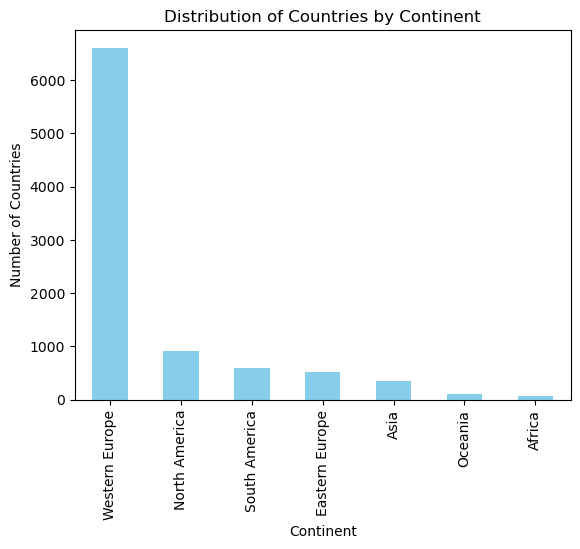

In [208]:
guests['Continent'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Countries by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.show()


In [209]:
guests['Continent'].value_counts()

Western Europe    6604
North America      922
South America      600
Eastern Europe     516
Asia               347
Oceania            111
Africa              61
Name: Continent, dtype: int64

In [210]:
guests.isna().sum()

ReservationId    0
Age              1
GuestCountry     0
Continent        0
dtype: int64

In [211]:
guests.dropna(subset=['Age'], inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_23096\3431124940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guests.dropna(subset=['Age'], inplace=True)


### Base de dados Reviews 1

In [212]:
reviews1

,ReservationId,RatingValue,Comments,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1879140693,8.0,"Very nice place, it was spacious and good loca...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1879140870,8.0,"Casa muito espaçosa, com ótima vista e relativ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1879139425,10.0,We only stayed for a few days but the place is...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1879129551,8.0,"Un sitio agradable, lo mejor la terraza y las ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1879139286,10.0,"Wonderful spacious apt, comfortable furniture,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13800,1879178889,5.0,"Apartamento claro e limpo, muito boas instalaç...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13801,1879187989,2.0,o apartamento não vale o dinheiro.esta é minha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13802,1879178958,5.0,"A comunicação foi muito suave, o lugar é incrí...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13803,1879180188,4.0,"pro: melhor localização no centro da cidade, o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
reviews1.isna().sum()

ReservationId      717
RatingValue         12
Comments          1575
Unnamed: 3       13801
Unnamed: 4       13803
Unnamed: 5       13803
Unnamed: 6       13804
Unnamed: 7       13804
Unnamed: 8       13804
Unnamed: 9       13804
Unnamed: 10      13804
Unnamed: 11      13804
Unnamed: 12      13804
Unnamed: 13      13804
dtype: int64

In [214]:
non_missing_values1 = reviews1[reviews1['Unnamed: 3'].notnull()]['Unnamed: 3']
non_missing_values1

2487     Il serait bien d’avoir un minimum de condiment...
6861      The host was pleasant.  The flat was very clean.
8508                                                     ?
10009    Situation parfaite au cœur du quartier tourist...
Name: Unnamed: 3, dtype: object

In [215]:

indices_to_concatenate = [2487 ,6861, 8508,10009]
reviews1.loc[indices_to_concatenate, 'Comments'] += reviews1.loc[indices_to_concatenate, 'Unnamed: 3'].fillna('')

In [216]:
selected_rows = reviews1.loc[indices_to_concatenate]
selected_rows['Comments']

2487     Séjour du 23 au 25 Juillet 2021  L’appartement...
6861     It was a great stay. There was a very nice ter...
8508     To Airbnb  The bad: At 5 pm we arrived to our ...
10009    Les + : -Situation parfaite au cœur du quartie...
Name: Comments, dtype: object

In [217]:
non_missing_values2 = reviews1[reviews1['Unnamed: 4'].notnull()]['Unnamed: 4']
non_missing_values2

2487     Nous n’avons pas pu profiter du patio. Les meu...
10009                    Grand lit confortable à l’étage -
Name: Unnamed: 4, dtype: object

In [218]:
indices_to_concatenate = [2487 ,10009]
reviews1.loc[indices_to_concatenate, 'Comments'] += reviews1.loc[indices_to_concatenate, 'Unnamed: 4'].fillna('')

In [219]:
non_missing_values3 = reviews1[reviews1['Unnamed: 5'].notnull()]['Unnamed: 5']
non_missing_values3

2487     Il serait bien d’avoir un plan de la ville ain...
10009                                    Salon convivial -
Name: Unnamed: 5, dtype: object

In [220]:
indices_to_concatenate = [2487 ,10009]
reviews1.loc[indices_to_concatenate, 'Comments'] += reviews1.loc[indices_to_concatenate, 'Unnamed: 5'].fillna('')

In [221]:
non_missing_values4 = reviews1[reviews1['Unnamed: 6'].notnull()]['Unnamed: 6']
non_missing_values4

10009    Cuisine équipée (four, micro-onde, grille-pain...
Name: Unnamed: 6, dtype: object

In [222]:
indices_to_concatenate = [10009]
reviews1.loc[indices_to_concatenate, 'Comments'] += reviews1.loc[indices_to_concatenate, 'Unnamed: 6'].fillna('')

In [223]:
non_missing_values5 = reviews1[reviews1['Unnamed: 7'].notnull()]['Unnamed: 7']
non_missing_values5

10009    Deux salles de bain (baignoire et douche) -
Name: Unnamed: 7, dtype: object

In [224]:
indices_to_concatenate = [10009]
reviews1.loc[indices_to_concatenate, 'Comments'] += reviews1.loc[indices_to_concatenate, 'Unnamed: 7'].fillna('')

In [225]:
non_missing_values6 = reviews1[reviews1['Unnamed: 8'].notnull()]['Unnamed: 8']
non_missing_values6

10009    Wifi fiable -
Name: Unnamed: 8, dtype: object

In [226]:
indices_to_concatenate = [10009]
reviews1.loc[indices_to_concatenate, 'Comments'] += reviews1.loc[indices_to_concatenate, 'Unnamed: 8'].fillna('')

In [227]:
non_missing_values7 = reviews1[reviews1['Unnamed: 9'].notnull()]['Unnamed: 9']
non_missing_values7

10009    Accueil chaleureux Les - : -
Name: Unnamed: 9, dtype: object

In [228]:
indices_to_concatenate = [10009]
reviews1.loc[indices_to_concatenate, 'Comments'] += reviews1.loc[indices_to_concatenate, 'Unnamed: 9'].fillna('')

In [229]:
non_missing_values8 = reviews1[reviews1['Unnamed: 10'].notnull()]['Unnamed: 10']
non_missing_values8

10009     !!! Absence de chauffage d’appoint !!! (nous ...
Name: Unnamed: 10, dtype: object

In [230]:
indices_to_concatenate = [10009]
reviews1.loc[indices_to_concatenate, 'Comments'] += reviews1.loc[indices_to_concatenate, 'Unnamed: 10'].fillna('')

In [231]:
non_missing_values9 = reviews1[reviews1['Unnamed: 11'].notnull()]['Unnamed: 11']
non_missing_values9

10009    Salle de bain mansardée à l’étage et donc impr...
Name: Unnamed: 11, dtype: object

In [232]:
indices_to_concatenate = [10009]
reviews1.loc[indices_to_concatenate, 'Comments'] += reviews1.loc[indices_to_concatenate, 'Unnamed: 11'].fillna('')

In [233]:
non_missing_values10 = reviews1[reviews1['Unnamed: 12'].notnull()]['Unnamed: 12']
non_missing_values10

10009    Absence de porte pour l’intimité des hôtes dor...
Name: Unnamed: 12, dtype: object

In [234]:
indices_to_concatenate = [10009]
reviews1.loc[indices_to_concatenate, 'Comments'] += reviews1.loc[indices_to_concatenate, 'Unnamed: 12'].fillna('')

In [235]:
non_missing_values11 = reviews1[reviews1['Unnamed: 13'].notnull()]['Unnamed: 13']
non_missing_values11

10009    Escaliers étroits et escarpés pour accéder à l...
Name: Unnamed: 13, dtype: object

In [236]:
indices_to_concatenate = [10009]
reviews1.loc[indices_to_concatenate, 'Comments'] += reviews1.loc[indices_to_concatenate, 'Unnamed: 13'].fillna('')

In [237]:
columns_to_drop = ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']
reviews1.drop(columns=columns_to_drop, inplace=True)

In [238]:
reviews1.isna().sum()

ReservationId     717
RatingValue        12
Comments         1575
dtype: int64

In [239]:
reviews1.shape

(13805, 3)

In [240]:
reviews1

,ReservationId,RatingValue,Comments
0,1879140693,8.0,"Very nice place, it was spacious and good loca..."
1,1879140870,8.0,"Casa muito espaçosa, com ótima vista e relativ..."
2,1879139425,10.0,We only stayed for a few days but the place is...
3,1879129551,8.0,"Un sitio agradable, lo mejor la terraza y las ..."
4,1879139286,10.0,"Wonderful spacious apt, comfortable furniture,..."
...,...,...,...
13800,1879178889,5.0,"Apartamento claro e limpo, muito boas instalaç..."
13801,1879187989,2.0,o apartamento não vale o dinheiro.esta é minha...
13802,1879178958,5.0,"A comunicação foi muito suave, o lugar é incrí..."
13803,1879180188,4.0,"pro: melhor localização no centro da cidade, o..."


with pd.ExcelWriter('PFACD\\FLH2.xlsx') as writer:
    # Write each DataFrame to a separate sheet
    res.to_excel(writer, sheet_name='Reservas', index=False)
    prop.to_excel(writer, sheet_name='Propriedades', index=False)
    guests.to_excel(writer, sheet_name='Hóspedes', index=False)
    reviews1.to_excel(writer, sheet_name='Reviews - geral', index=False)
    reviews2.to_excel(writer, sheet_name='Reviews - detalhe', index=False)

## Exportamos os dados para fazer a tradução das reviews todas para inglês à parte


## Agora vamos importar os dados já traduzidos

In [7]:
file ="PFACD\\TradFinal.xlsx"


res = pd.read_excel(file, 'Reservas')
prop = pd.read_excel(file, 'Propriedades')
guests = pd.read_excel(file, 'Hóspedes')
reviews1 = pd.read_excel(file, 'Reviews - geral')
reviews2 = pd.read_excel(file, 'Reviews - detalhe')




In [8]:
reviews1.loc[reviews1['RatingValue'] == 44, 'RatingValue'] = 4


In [9]:
def assign_polarity(row):
    if row.name <= 10631:
        if row['RatingValue'] in [1, 2, 3, 4]:
            return 'Negative'
        elif row['RatingValue'] in [5, 6]:
            return 'Neutral'
        elif row['RatingValue'] in [7, 8, 9, 10]:
            return 'Positive'
    else:
        if row['RatingValue'] in [1, 2]:
            return 'Negative'
        elif row['RatingValue'] == 3:
            return 'Neutral'
        elif row['RatingValue'] in [4, 5]:
            return 'Positive'

reviews1['Polarity'] = reviews1.apply(assign_polarity, axis=1)

In [10]:
def assign_nps(row):
    if row.name <= 10631:
        if row['RatingValue'] in [1, 2]:
            return 'Awfull'
        elif row['RatingValue'] in [3, 4]:
            return 'Bad'
        elif row['RatingValue'] in [5, 6]:
            return 'Neutral'
        elif row['RatingValue'] in [7, 8]:
            return 'Good'
        elif row['RatingValue'] in [9, 10]:
            return 'Very Good'                                    
    else:
        if row['RatingValue'] == 1:
            return 'Awfull'
        elif row['RatingValue'] == 2:
            return 'Bad'
        elif row['RatingValue'] == 3:
            return 'Neutral'
        elif row['RatingValue'] == 4:
            return 'Good'
        elif row['RatingValue'] == 5:
            return 'Very Good'

reviews1['NetPromoterScore'] = reviews1.apply(assign_nps, axis=1)

In [11]:
reviews1.head(20)

,ReservationId,RatingValue,Comments,Language,EngTrad,Polarity,NetPromoterScore
0,1.879141e+09,8.0,"Very nice place, it was spacious and good loca...",__label__eng_Latn,"Very nice place, it was spacious and well-loca...",Positive,Good
1,1.879141e+09,8.0,"Casa muito espaçosa, com ótima vista e relativ...",__label__por_Latn,"""Very spacious house, with great views and rel...",Positive,Good
2,1.879139e+09,10.0,We only stayed for a few days but the place is...,__label__eng_Latn,''We only stayed for a few days but the place ...,Positive,Very Good
3,1.879130e+09,8.0,"Un sitio agradable, lo mejor la terraza y las ...",__label__spa_Latn,"""A pleasant site, the best part is the terrace...",Positive,Good
4,1.879139e+09,10.0,"Wonderful spacious apt, comfortable furniture,...",__label__eng_Latn,"'''Wonderful spacious apt, comfortable furnitu...",Positive,Very Good
5,1.879140e+09,8.0,"Good and decent apartment, clean, but widows a...",__label__eng_Latn,"""Good and decent apartment, clean, but windows...",Positive,Good
6,1.879131e+09,8.0,"Le logement est très très bien situé, propre d...",__label__fra_Latn,"The accommodation is very well located, clean ...",Positive,Good
7,1.879138e+09,10.0,"Le studio était très propre, tout est encore f...",__label__fra_Latn,"The studio was very clean, everything is still...",Positive,Very Good
8,1.879138e+09,8.0,Apparemment idéalement placé clair et spacieux...,__label__fra_Latn,"""Apparently ideally located, bright and spacio...",Positive,Good
9,1.879119e+09,8.0,"Ótima estadia! Perto do centro, limpo, a comun...",__label__por_Latn,"""Great stay! Close to the center, clean, and c...",Positive,Good


In [12]:
reviews1.shape

(11244, 7)

In [13]:
reviews1.dropna(subset=["Comments"], inplace= True)

In [14]:
reviews1.head(20)

,ReservationId,RatingValue,Comments,Language,EngTrad,Polarity,NetPromoterScore
0,1.879141e+09,8.0,"Very nice place, it was spacious and good loca...",__label__eng_Latn,"Very nice place, it was spacious and well-loca...",Positive,Good
1,1.879141e+09,8.0,"Casa muito espaçosa, com ótima vista e relativ...",__label__por_Latn,"""Very spacious house, with great views and rel...",Positive,Good
2,1.879139e+09,10.0,We only stayed for a few days but the place is...,__label__eng_Latn,''We only stayed for a few days but the place ...,Positive,Very Good
3,1.879130e+09,8.0,"Un sitio agradable, lo mejor la terraza y las ...",__label__spa_Latn,"""A pleasant site, the best part is the terrace...",Positive,Good
4,1.879139e+09,10.0,"Wonderful spacious apt, comfortable furniture,...",__label__eng_Latn,"'''Wonderful spacious apt, comfortable furnitu...",Positive,Very Good
5,1.879140e+09,8.0,"Good and decent apartment, clean, but widows a...",__label__eng_Latn,"""Good and decent apartment, clean, but windows...",Positive,Good
6,1.879131e+09,8.0,"Le logement est très très bien situé, propre d...",__label__fra_Latn,"The accommodation is very well located, clean ...",Positive,Good
7,1.879138e+09,10.0,"Le studio était très propre, tout est encore f...",__label__fra_Latn,"The studio was very clean, everything is still...",Positive,Very Good
8,1.879138e+09,8.0,Apparemment idéalement placé clair et spacieux...,__label__fra_Latn,"""Apparently ideally located, bright and spacio...",Positive,Good
9,1.879119e+09,8.0,"Ótima estadia! Perto do centro, limpo, a comun...",__label__por_Latn,"""Great stay! Close to the center, clean, and c...",Positive,Good


In [15]:
reviews1.shape

(11244, 7)

In [16]:
reviews1.rename(columns={'EngTrad': 'Translated'}, inplace=True)

## Text pre-processing

####   Lower Casing the Data

In [17]:
reviews1['Translated'] = reviews1['Translated'].str.lower()

#### Removing Contractions

In [18]:
def remove_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text


reviews1['Translated'] = reviews1['Translated'].apply(remove_contractions)


####  Removing Punctuations

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuation(text):
    return re.sub(f'[{string.punctuation}]', '', text)


reviews1['Translated'] = reviews1['Translated'].apply(remove_punctuation)


####  Removing Extra Space

In [21]:
reviews1['Translated'] = reviews1['Translated'].apply(lambda text: " ".join(text.split()))


#### Removing/Conversion  Emojis and Emoticons

In [22]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [23]:
reviews1['Translated'] = reviews1['Translated'].apply(remove_emoji)

In [24]:
EMOTICONS_EMO = {
    u":‑)":"Happy face or smiley",
    u":-))":"Very Happy face or smiley",
    u":-)))":"Very very Happy face or smiley",
    u":)":"Happy face or smiley",
    u":))":"Very Happy face or smiley",
    u":)))":"Very very Happy face or smiley",
    u":-]":"Happy face or smiley",
    u":]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-)":"Happy face smiley",
    u":o)":"Happy face smiley",
    u":-}":"Happy face smiley",
    u":}":"Happy face smiley",
    u":-)":"Happy face smiley",
    u":c)":"Happy face smiley",
    u":^)":"Happy face smiley",
    u"=]":"Happy face smiley",
    u"=)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B^D":"Laughing, big grin or laugh with glasses",
    u":-))":"Very happy",
    u":-(":"Frown, sad, angry or pouting",
    u":‑(":"Frown, sad, angry or pouting",
    u":(":"Frown, sad, angry or pouting",
    u":‑c":"Frown, sad, angry or pouting",
    u":c":"Frown, sad, angry or pouting",
    u":‑<":"Frown, sad, angry or pouting",
    u":<":"Frown, sad, angry or pouting",
    u":‑[":"Frown, sad, angry or pouting",
    u":[":"Frown, sad, angry or pouting",
    u":-||":"Frown, sad, angry or pouting",
    u">:[":"Frown, sad, angry or pouting",
    u":{":"Frown, sad, angry or pouting",
    u":@":"Frown, sad, angry or pouting",
    u">:(":"Frown, sad, angry or pouting",
    u":'‑(":"Crying",
    u":'(":"Crying",
    u":'‑)":"Tears of happiness",
    u":')":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-*":"Kiss",
    u":*":"Kiss",
    u":X":"Kiss",
    u";‑)":"Wink or smirk",
    u";)":"Wink or smirk",
    u"*-)":"Wink or smirk",
    u"*)":"Wink or smirk",
    u";‑]":"Wink or smirk",
    u";]":"Wink or smirk",
    u";^)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑|":"Straight face",
    u":|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑)":"Angel, saint or innocent",
    u"O:)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑)":"Angel, saint or innocent",
    u"0:)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;^)":"Angel, saint or innocent",
    u">:‑)":"Evil or devilish",
    u">:)":"Evil or devilish",
    u"}:‑)":"Evil or devilish",
    u"}:)":"Evil or devilish",
    u"3:‑)":"Evil or devilish",
    u"3:)":"Evil or devilish",
    u">;)":"Evil or devilish",
    u"|;‑)":"Cool",
    u"|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑)":"Party all night",
    u"%‑)":"Drunk or confused",
    u"%)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑|":"Dump",
    u"(>_<)":"Troubled",
    u"(>_<)>":"Troubled",
    u"(';')":"Baby",
    u"(^^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(^_^;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(~_~;) (・.・;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-)zzz":"Sleeping",
    u"(^_-)":"Wink",
    u"((+_+))":"Confused",
    u"(+o+)":"Confused",
    u"(o|o)":"Ultraman",
    u"^_^":"Joyful",
    u"(^_^)/":"Joyful",
    u"(^O^)／":"Joyful",
    u"(^o^)／":"Joyful",
    u"(__)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_(._.)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<(_ _)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m(__)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(__)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(_ _)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"('_')":"Sad or Crying",
    u"(/_;)":"Sad or Crying",
    u"(T_T) (;_;)":"Sad or Crying",
    u"(;_;":"Sad of Crying",
    u"(;_:)":"Sad or Crying",
    u"(;O;)":"Sad or Crying",
    u"(:_;)":"Sad or Crying",
    u"(ToT)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q.Q":"Sad or Crying",
    u"T.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"(-.-)":"Shame",
    u"(-_-)":"Shame",
    u"(一一)":"Shame",
    u"(；一_一)":"Shame",
    u"(=_=)":"Tired",
    u"(=^·^=)":"cat",
    u"(=^··^=)":"cat",
    u"=_^= ":"cat",
    u"(..)":"Looking down",
    u"(._.)":"Looking down",
    u"^m^":"Giggling with hand covering mouth",
    u"(・・?":"Confusion",
    u"(?_?)":"Confusion",
    u">^_^<":"Normal Laugh",
    u"<^!^>":"Normal Laugh",
    u"^/^":"Normal Laugh",
    u"（*^_^*）" :"Normal Laugh",
    u"(^<^) (^.^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^.^)":"Normal Laugh",
    u"(^_^.)":"Normal Laugh",
    u"(^_^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^J^)":"Normal Laugh",
    u"(*^.^*)":"Normal Laugh",
    u"(^—^）":"Normal Laugh",
    u"(#^.^#)":"Normal Laugh",
    u"（^—^）":"Waving",
    u"(;_;)/~~~":"Waving",
    u"(^.^)/~~~":"Waving",
    u"(-_-)/~~~ ($··)/~~~":"Waving",
    u"(T_T)/~~~":"Waving",
    u"(ToT)/~~~":"Waving",
    u"(*^0^*)":"Excited",
    u"(*_*)":"Amazed",
    u"(*_*;":"Amazed",
    u"(+_+) (@_@)":"Amazed",
    u"(*^^)v":"Laughing,Cheerful",
    u"(^_^)v":"Laughing,Cheerful",
    u"((d[-_-]b))":"Headphones,Listening to music",
    u'(-"-)':"Worried",
    u"(ーー;)":"Worried",
    u"(^0_0^)":"Eyeglasses",
    u"(＾ｖ＾)":"Happy",
    u"(＾ｕ＾)":"Happy",
    u"(^)o(^)":"Happy",
    u"(^O^)":"Happy",
    u"(^o^)":"Happy",
    u")^o^(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o.O":"Surpised",
    u"(o.o)":"Surprised",
    u"oO":"Surprised",
    u"(*￣m￣)":"Dissatisfied",
    u"(‘A`)":"Snubbed or Deflated"

}

In [25]:
def replace_emoticons(text):
    emoticons_pattern = re.compile(u'(' + u'|'.join(re.escape(k) for k in EMOTICONS_EMO) + u')')
    return emoticons_pattern.sub(lambda x: EMOTICONS_EMO[x.group()], text)

# Apply emoticons replacement to the 'translated_reviews' column
reviews1['Translated'] = reviews1['Translated'].apply(replace_emoticons)

#### Removal of stopwords

In [26]:
nltk.download('stopwords')
nltk.download('punkt')


# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Apply the function to the 'translated_reviews' column
reviews1['Translated'] = reviews1['Translated'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Lemmatization

In [27]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

True

In [28]:
lemmatizer = WordNetLemmatizer()


In [29]:
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

reviews1['Translated'] = reviews1['Translated'].apply(lambda text: lemmatize_words(text))

#### Spelling Correction

In [30]:
reviews1.isna().sum()

ReservationId       679
RatingValue           9
Comments              0
Language              0
Translated            0
Polarity              9
NetPromoterScore      9
dtype: int64

In [31]:
reviews1.shape

(11244, 7)

In [32]:
mask = np.array(Image.open(r"C:\Users\asus\Pictures\85c18d553c73c597f739e6f2f38c6d78.jpg"))

In [33]:
comments = reviews1['Translated']

In [34]:
comments = reviews1['Translated'].dropna().astype(str)

In [35]:
all_comments = ' '.join(comments)

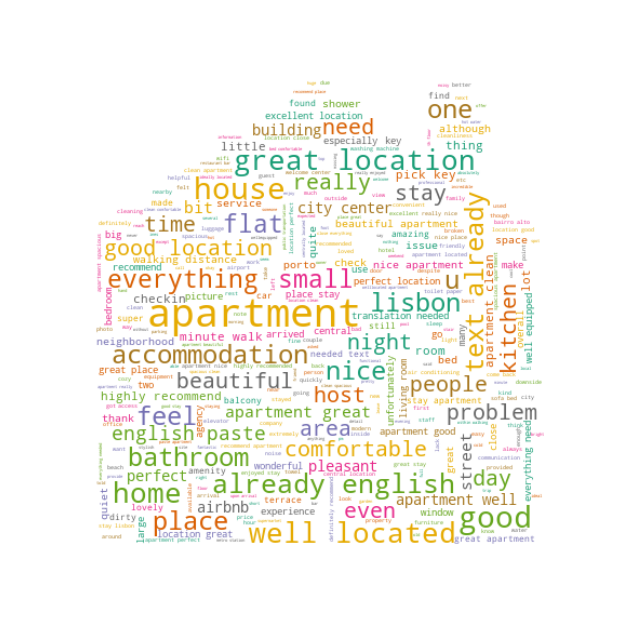

In [36]:
wc = WordCloud(mask=mask, background_color="white",
               max_words=3000, max_font_size=300,
               random_state=42, width=mask.shape[1]*2,
               height=mask.shape[0]*2,
               colormap='Dark2')  # Change to a darker colormap, e.g., 'Dark2'

wc.generate(all_comments)
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

with pd.ExcelWriter('C:\\Users\\asus\\Desktop\\PFACD\\DadosFinais.xlsx') as writer:
    # Write each DataFrame to a separate sheet
    res.to_excel(writer, sheet_name='Reservas', index=False)
    prop.to_excel(writer, sheet_name='Propriedades', index=False)
    guests.to_excel(writer, sheet_name='Hóspedes', index=False)
    reviews1.to_excel(writer, sheet_name='Reviews - geral', index=False)
    reviews2.to_excel(writer, sheet_name='Reviews - detalhe', index=False)